In [24]:
import numpy as np
import pandas as pd
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [25]:
# Read&Clean the data
sms = pd.read_csv('spam.csv',encoding = 'UTF-16')
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms = sms.rename(columns = {'v1':'label','v2':'message'})

In [26]:
# Clean stem and vectorize our features:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [27]:
text_feat = sms['message'].copy()
text_feat = text_feat.apply(text_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(text_feat)

In [28]:
# split for fitting and testing our Classifiers:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
# Support VectorClassifier
# Test kernel and Gamma options
pred_scores = []
krnl = {'rbf' : 'rbf','polynominal' : 'poly', 'sigmoid': 'sigmoid'}
for k,v in krnl.items():
    for i in np.linspace(0.05, 1, num=20):
        svc = SVC(kernel=v, gamma=i)
        svc.fit(features_train, labels_train)
        pred = svc.predict(features_test)
        pred_scores.append((k, [i, accuracy_score(labels_test,pred)]))

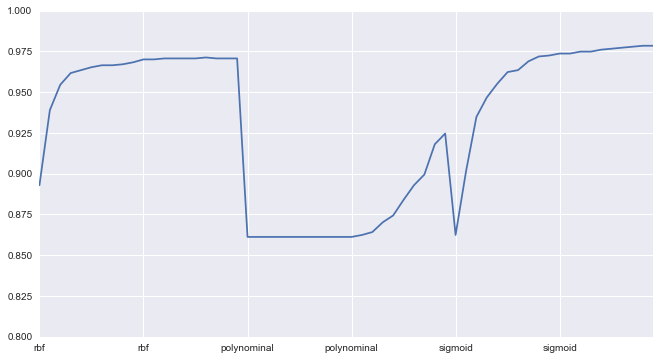

In [31]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Gamma','Score'])
df['Score'].plot(kind='line', figsize=(11,6), ylim=(0.8,1.0))

In [34]:
df[df['Score'] == df['Score'].max()]

,Gamma,Score
sigmoid,0.95,0.978469
sigmoid,1.00,0.978469


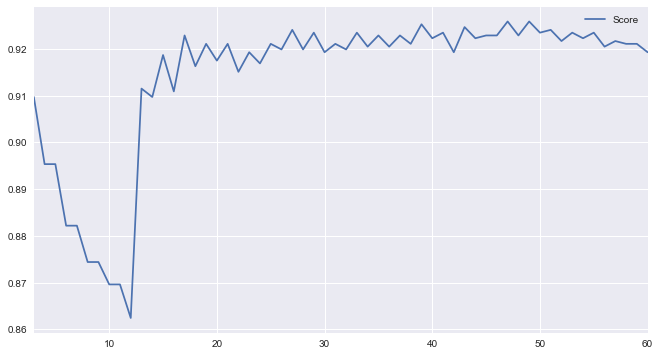

In [35]:
# K-Neighbours Classifier
pred_scores = []
for i in range(3,61):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(features_train, labels_train)
    pred = knc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))


In [36]:
df[df['Score'] == df['Score'].max()]

,Score
47,0.925837
49,0.925837


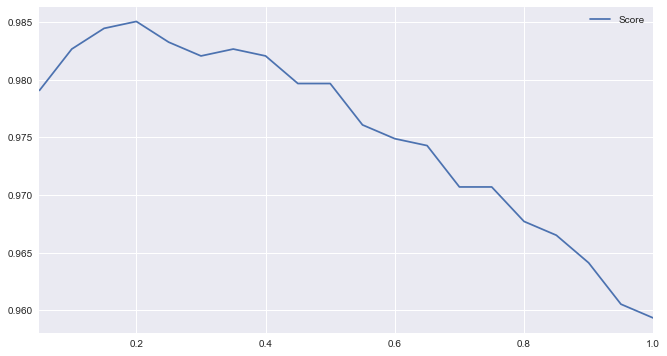

In [37]:
# Multinominal NaiveBayes Classifier
pred_scores = []
for i in np.linspace(0.05, 1, num=20):
    mnb = MultinomialNB(alpha=i)
    mnb.fit(features_train, labels_train)
    pred = mnb.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))


In [38]:
df[df['Score'] == df['Score'].max()]

,Score
0.2,0.985048


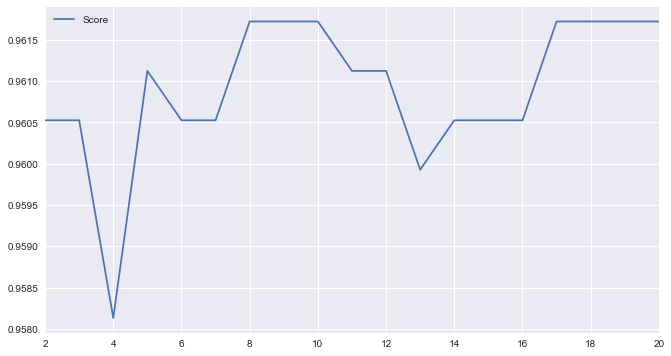

In [39]:
# DecisionTree Classifier
pred_scores = []
for i in range(2,21):
    dtc = DecisionTreeClassifier(min_samples_split=i, random_state=1)
    dtc.fit(features_train, labels_train)
    pred = dtc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [40]:
df[df['Score'] == df['Score'].max()]

,Score
8,0.961722
9,0.961722
10,0.961722
17,0.961722
18,0.961722
19,0.961722
20,0.961722


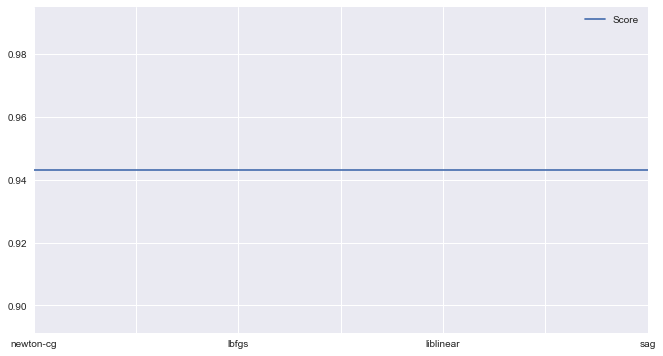

In [41]:
# Logistic Regression
slvr = {'newton-cg' : 'newton-cg', 'lbfgs': 'lbfgs', 'liblinear': 'liblinear', 'sag': 'sag'}
pred_scores = []
for k,v in slvr.items():
    lrc = LogisticRegression(solver=v, penalty='l2')
    lrc.fit(features_train, labels_train)
    pred = lrc.predict(features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [42]:
df[df['Score'] == df['Score'].max()]

,Score
newton-cg,0.943182
lbfgs,0.943182
liblinear,0.943182
sag,0.943182


In [43]:
# Ensemble classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

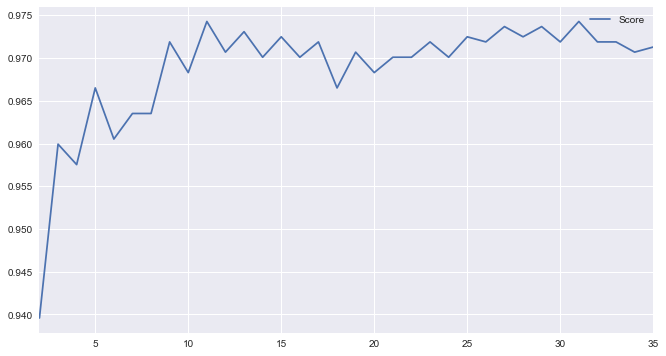

In [44]:
# RandomForest Classifier
pred_scores = []
for i in range(2,36):
    rfc = RandomForestClassifier(n_estimators=i, random_state=111)
    rfc.fit(features_train, labels_train)
    pred = rfc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [45]:
df[df['Score'] == df['Score'].max()]

,Score
11,0.974282
31,0.974282


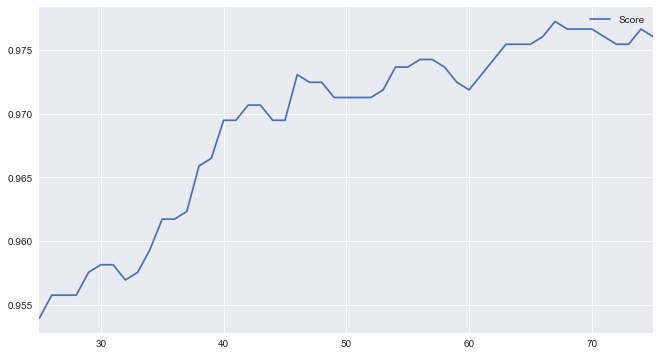

In [46]:
# AdaBoost Classifier
pred_scores = []
for i in range(25,76):
    abc = AdaBoostClassifier(n_estimators=i, random_state=111)
    abc.fit(features_train, labels_train)
    pred = abc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [47]:
df[df['Score'] == df['Score'].max()]

,Score
67,0.977273


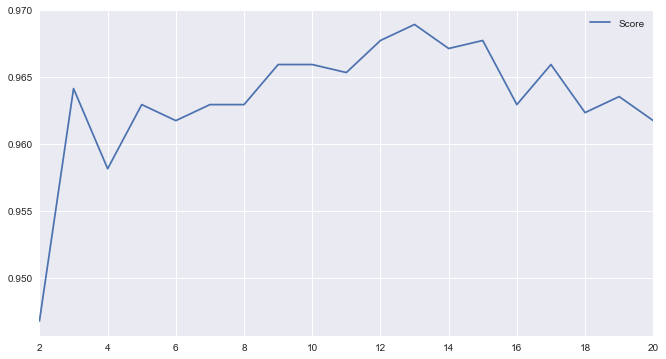

In [48]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
pred_scores = []
for i in range(2,21):
    bc = BaggingClassifier(n_estimators=i, random_state=111)
    bc.fit(features_train, labels_train)
    pred = bc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [49]:
df[df['Score'] == df['Score'].max()]

,Score
13,0.9689


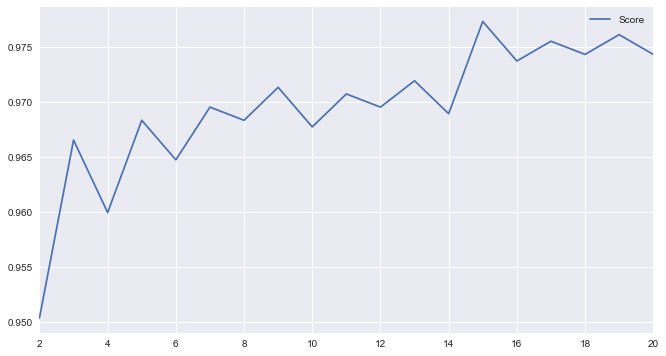

In [50]:
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
pred_scores = []
for i in range(2,21):
    etc = ExtraTreesClassifier(n_estimators=i, random_state=111)
    etc.fit(features_train, labels_train)
    pred = etc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [51]:
df[df['Score'] == df['Score'].max()]

,Score
15,0.977273
